<a href="https://colab.research.google.com/github/skandanyal/ML_Lab_2025_2026/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Lab 5

 Binary classification of MNIST handwritten digits of 0 and 1.

### Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

# Load CSV files from the correct path
train_data = pd.read_csv(f"{path}/mnist_train.csv")
test_data = pd.read_csv(f"{path}/mnist_test.csv")

print("Test data:\n\n", test_data.head())
print("\n###############\n")
print("Train data:\n\n", train_data.head())

Test data:

    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

###############

Train data:

    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0

In [3]:
# size of training and testing dataset

print(f"Size of train dataset: {len(train_data)}")
print(f"Size of test dataset: {len(test_data)}")

Size of train dataset: 60000
Size of test dataset: 10000


## Picking and reshaping data for binary classification

In [4]:
# Picking only 0's and 1's

train_data = train_data[train_data['label'].isin([0, 1])]
test_data = test_data[test_data['label'].isin([0, 1])]

In [5]:
# Checking for unique values in the dataset

print(train_data['label'].unique())
print(test_data['label'].unique())

[0 1]
[1 0]


In [6]:
# Reshaping data

print("Reshaping data...")

train_data_final = train_data.drop(
    columns=['label'],
    axis=1
)
test_data_final = test_data.drop(
    columns=['label'],
    axis=1
)
train_labels = train_data['label']
test_labels = test_data['label']

# Normalizing the dataset

train_data_final /= 255.0
test_data_final /= 255.0

print("Data is ready!")

Reshaping data...
Data is ready!


## Splitting the dataset into X and y matrix

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train_data_final,
    train_labels,
    test_size=0.167,
    random_state=5

)

X_test, y_test = test_data_final, test_labels

print("X and y matrices are formed.")

X and y matrices are formed.


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Define parameter grid to explore
C_values = [0.1, 1, 10]          # Regularization strengths
solvers = ['lbfgs', 'saga']            # Suitable solvers for large datasets
penalties = ['l2']                    # 'l1' also possible with saga, but slower

results = []

# Loop over all parameter combinations
for C in C_values:
    for solver in solvers:
        for penalty in penalties:
            print(f"Training LogisticRegression(C={C}, solver='{solver}', penalty='{penalty}')")
            try:
                start = time.time()
                # Train model
                model = LogisticRegression(
                    C=C,
                    solver=solver,
                    penalty=penalty,
                    max_iter=200,
                    n_jobs=-1
                )
                model.fit(X_train, y_train)

                # Evaluate on validation set
                y_pred = model.predict(X_val)
                acc = accuracy_score(y_val, y_pred)
                end = time.time()

                results.append((C, solver, penalty, acc))
                print(f"Validation Accuracy: {acc:.4f}")
                print(f"Time taken to train and validate: {end-start:.4f} seconds.\n\n")


            except Exception as e:
                print(f"Skipped combination (C={C}, solver={solver}, penalty={penalty}): {e}\n")

# Convert results to sorted DataFrame
import pandas as pd
results_df = pd.DataFrame(results, columns=['C', 'solver', 'penalty', 'val_accuracy'])
print("\n=== Results Summary ===")
print(results_df.sort_values(by='val_accuracy', ascending=False))


Training LogisticRegression(C=0.1, solver='lbfgs', penalty='l2')
Validation Accuracy: 0.9991
Time taken to train and validate: 4.2059 seconds.


Training LogisticRegression(C=0.1, solver='saga', penalty='l2')


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy: 0.9991
Time taken to train and validate: 32.8873 seconds.


Training LogisticRegression(C=1, solver='lbfgs', penalty='l2')
Validation Accuracy: 0.9995
Time taken to train and validate: 1.6746 seconds.


Training LogisticRegression(C=1, solver='saga', penalty='l2')


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy: 0.9995
Time taken to train and validate: 31.1131 seconds.


Training LogisticRegression(C=10, solver='lbfgs', penalty='l2')
Validation Accuracy: 0.9995
Time taken to train and validate: 1.3651 seconds.


Training LogisticRegression(C=10, solver='saga', penalty='l2')
Validation Accuracy: 0.9995
Time taken to train and validate: 33.8726 seconds.



=== Results Summary ===
      C solver penalty  val_accuracy
3   1.0   saga      l2      0.999527
2   1.0  lbfgs      l2      0.999527
4  10.0  lbfgs      l2      0.999527
5  10.0   saga      l2      0.999527
1   0.1   saga      l2      0.999055
0   0.1  lbfgs      l2      0.999055


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Training the model with best set of hyperparameters

In [9]:
# revealing the best combination of hypermeters

best = results_df.sort_values(by='val_accuracy', ascending=False).iloc[0]
print(f"Best config: C={best.C}, solver='{best.solver}', penalty='{best.penalty}' (acc={best.val_accuracy:.4f})")

Best config: C=1.0, solver='saga', penalty='l2' (acc=0.9995)


In [11]:
# training the best possible model

import time

start = time.time()

best_model = LogisticRegression(
    C=best.C,
    solver=best.solver,
    penalty=best.penalty,
    max_iter=200,
    n_jobs=-1
)

best_model.fit(X_train, y_train)

end = time.time()

print(f"\nTime taken: {end-start:.4f} seconds.")


Time taken: 32.1099 seconds.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [12]:
# Finding the accuracy of the trained model

y_pred_test = best_model.predict(X_test)

from sklearn.metrics import  confusion_matrix

test_acc = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9995


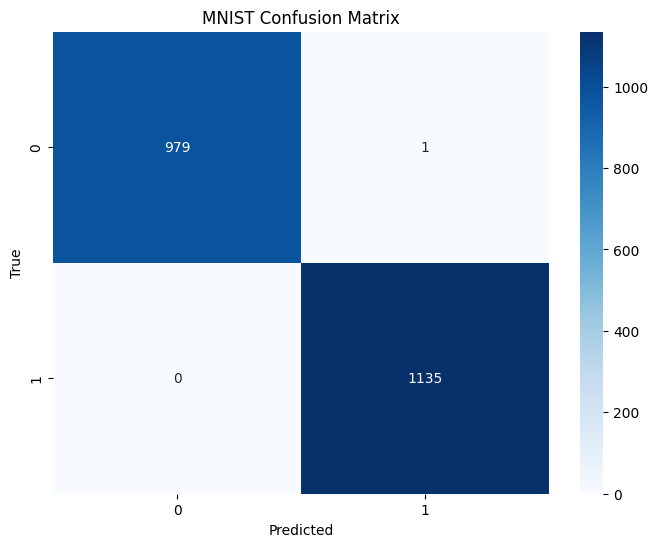

In [13]:
# Confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("MNIST Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

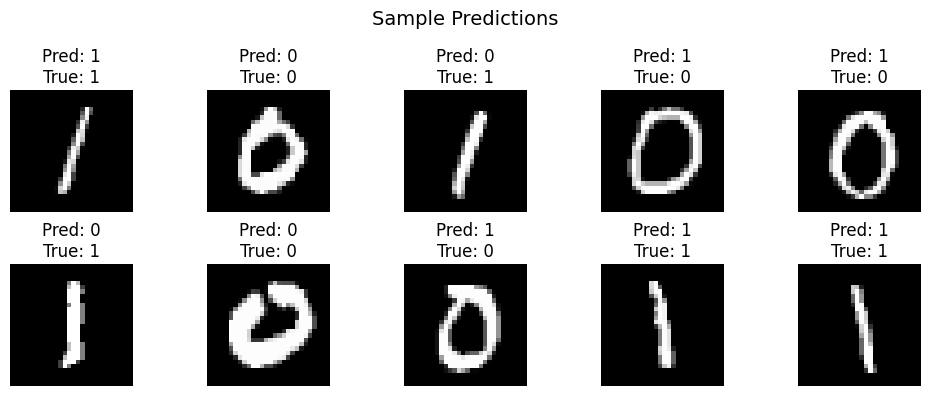

In [14]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test.iloc[i]}")
    plt.axis('off')

plt.suptitle("Sample Predictions", fontsize=14)
plt.tight_layout()
plt.show()